<a href="https://colab.research.google.com/github/twyeh/university-physics/blob/%E9%9B%BB%E7%A3%81%E5%AD%B8/electric_fileds_of_a_line_baripynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Calculate and visualize the electric field distribution generated by a line charge using a quiver plot, and provide insights into the visualization.

## 定義參數

### Subtask:
定義線電荷的物理常數（例如，庫侖常數、電荷密度）和幾何參數（例如，線電荷的長度、位置）。


**Reasoning**:
The subtask requires defining several physical constants and geometric parameters. I will use a code block to define these variables in Python, including importing the `math` module for the value of pi.



In [14]:
import math

# 1. Define the permittivity of free space 'epsilon_0'
epsilon_0 = 8.854  # F/m
print(f"Permittivity of free space (epsilon_0): {epsilon_0} F/m")

# 2. Calculate Coulomb's constant 'k'
k = 1 / (4 * math.pi * epsilon_0)
print(f"Coulomb's constant (k): {k} N m^2/C^2")

# 3. Define the linear charge density 'lambda_charge'
lambda_charge = 1.0  # C/m
print(f"Linear charge density (lambda_charge): {lambda_charge} C/m")

# 4. Define the total length of the line charge 'L'
L = 2.0  # meters
print(f"Length of the line charge (L): {L} meters")

# 5. Define the start and end points of the line charge along the x-axis
x_start = -1.0  # meters
x_end = 1.0  # meters
print(f"Line charge start point (x_start): {x_start} meters")
print(f"Line charge end point (x_end): {x_end} meters")

Permittivity of free space (epsilon_0): 8.854 F/m
Coulomb's constant (k): 0.008987742437988219 N m^2/C^2
Linear charge density (lambda_charge): 1.0 C/m
Length of the line charge (L): 2.0 meters
Line charge start point (x_start): -1.0 meters
Line charge end point (x_end): 1.0 meters


## 建立計算網格

### Subtask:
建立一個二維點網格 (x, y)，用於計算每個點的電場向量。


**Reasoning**:
I need to establish a 2D grid of points (x, y) where the electric field will be calculated. This involves defining the grid boundaries, the density of points within the grid, and then generating the coordinate matrices using `numpy` functions like `linspace` and `meshgrid`.



In [15]:
import numpy as np

# 1. Define the minimum and maximum values for the x and y coordinates of the grid
x_min, x_max = -3.0, 3.0  # meters
y_min, y_max = -3.0, 3.0  # meters
print(f"X-axis range: [{x_min}, {x_max}] meters")
print(f"Y-axis range: [{y_min}, {y_max}] meters")

# 2. Define the number of points to use along the x-axis and y-axis
n_points_x = 40
n_points_y = 40
print(f"Number of points along X-axis: {n_points_x}")
print(f"Number of points along Y-axis: {n_points_y}")

# 3. Use np.linspace() to create one-dimensional arrays for x and y coordinates
x_coords = np.linspace(x_min, x_max, n_points_x)
y_coords = np.linspace(y_min, y_max, n_points_y)
print(f"Generated x_coords array with shape: {x_coords.shape}")
print(f"Generated y_coords array with shape: {y_coords.shape}")

# 4. Use np.meshgrid() to transform these into two-dimensional grid matrices (X, Y)
X, Y = np.meshgrid(x_coords, y_coords)
print(f"Generated 2D grid matrix X with shape: {X.shape}")
print(f"Generated 2D grid matrix Y with shape: {Y.shape}")

X-axis range: [-3.0, 3.0] meters
Y-axis range: [-3.0, 3.0] meters
Number of points along X-axis: 40
Number of points along Y-axis: 40
Generated x_coords array with shape: (40,)
Generated y_coords array with shape: (40,)
Generated 2D grid matrix X with shape: (40, 40)
Generated 2D grid matrix Y with shape: (40, 40)


# Task
## 計算電場

### Subtask:
根據線電荷在每個網格點上的貢獻，計算電場的 x 和 y 分量。這將涉及積分或使用已知公式。

## 計算電場

### Subtask:
根據線電荷在每個網格點上的貢獻，計算電場的 x 和 y 分量。這將涉及積分或使用已知公式。


**Reasoning**:
I need to calculate the electric field components E_x and E_y based on the given formulas and handle potential division by zero scenarios as instructed. This involves defining an epsilon value, calculating distances, and then applying the formulas while masking problematic points.



In [16]:
import numpy as np

# 1. Define a small numerical tolerance `epsilon_val`
epsilon_val = 1e-9
print(f"Defined epsilon_val: {epsilon_val}")

# 2. Calculate the magnitude of the distance from each grid point (X, Y) to the start of the line charge (x_start, 0)
# r_start_mag = sqrt((X - x_start)^2 + (Y - 0)^2)
r_start_mag = np.sqrt((X - x_start)**2 + Y**2)
print(f"Calculated r_start_mag with shape: {r_start_mag.shape}")

# 3. Calculate the magnitude of the distance from each grid point (X, Y) to the end of the line charge (x_end, 0)
# r_end_mag = sqrt((X - x_end)^2 + (Y - 0)^2)
r_end_mag = np.sqrt((X - x_end)**2 + Y**2)
print(f"Calculated r_end_mag with shape: {r_end_mag.shape}")

# 4. Calculate the x-component of the electric field E_x
# E_x = k * lambda_charge * (1 / r_end_mag - 1 / r_start_mag)
E_x = k * lambda_charge * (1 / r_end_mag - 1 / r_start_mag)
print(f"Calculated initial E_x with shape: {E_x.shape}")

# 5. Create a safe Y_safe array to avoid division by zero for E_y calculation
Y_safe = np.where(np.abs(Y) < epsilon_val, epsilon_val, Y)
print(f"Created Y_safe with shape: {Y_safe.shape}")

# 6. Calculate the y-component of the electric field E_y
# E_y = (k * lambda_charge / Y_safe) * ((X - x_end) / r_end_mag - (X - x_start) / r_start_mag)
E_y = (k * lambda_charge / Y_safe) * ((X - x_end) / r_end_mag - (X - x_start) / r_start_mag)
print(f"Calculated initial E_y with shape: {E_y.shape}")

# 7. Identify and mask out points where the electric field is undefined or extremely large due to proximity to the line charge
# These are points where abs(Y) < epsilon_val and X is between x_start and x_end (inclusive)
line_charge_mask = (np.abs(Y) < epsilon_val) & (X >= x_start - epsilon_val) & (X <= x_end + epsilon_val)

E_x[line_charge_mask] = np.nan
E_y[line_charge_mask] = np.nan

print("Masked E_x and E_y for points on or very close to the line charge.")
print(f"Final E_x (first few values):\n{E_x.flatten()[:5]}")
print(f"Final E_y (first few values):\n{E_y.flatten()[:5]}")

Defined epsilon_val: 1e-09
Calculated r_start_mag with shape: (40, 40)
Calculated r_end_mag with shape: (40, 40)
Calculated initial E_x with shape: (40, 40)
Created Y_safe with shape: (40, 40)
Calculated initial E_y with shape: (40, 40)
Masked E_x and E_y for points on or very close to the line charge.
Final E_x (first few values):
[-0.0006952  -0.00070891 -0.00072018 -0.0007284  -0.00073296]
Final E_y (first few values):
[0.0007349  0.00079213 0.00085321 0.00091807 0.00098652]


## 繪製電場分佈

### Subtask:
使用箭頭圖（quiver plot）可視化電場分佈，顯示每個網格點處電場向量的方向和強度。請務必包含圖例以解釋圖示。


**Reasoning**:
To visualize the electric field distribution, I will generate a code block that uses `matplotlib.pyplot` to create a quiver plot of the electric field vectors (E_x, E_y) at each grid point (X, Y). I will also plot the line charge itself and add appropriate labels and a title for clarity.



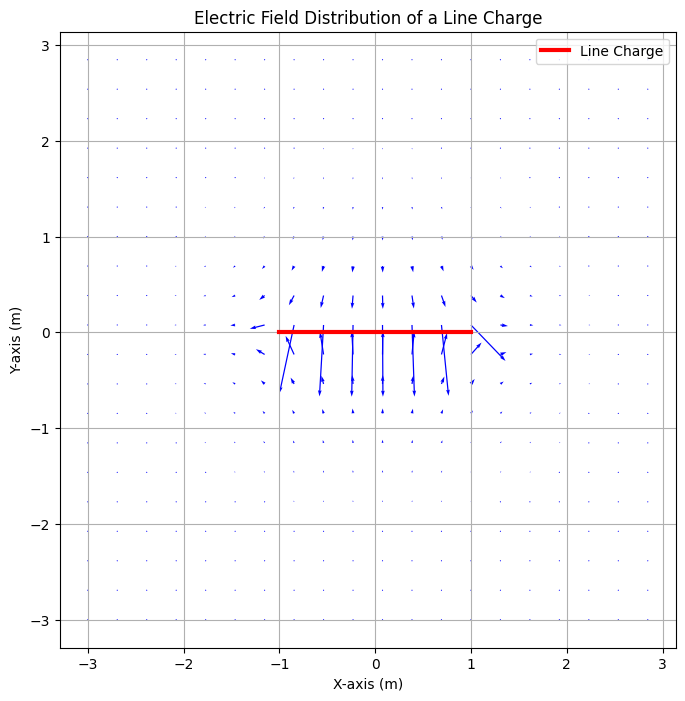

In [21]:
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the electric field using quiver
# The 'scale' parameter controls the length of the arrows. Smaller scale means longer arrows.
# The 'color' parameter sets the color of the arrows.
# We use X, Y for the starting points of the arrows and E_x, E_y for the components.
# We use slice notation to reduce the number of arrows plotted for better readability, e.g., every 3rd point.
ax.quiver(X[::1, ::1], Y[::1, ::1], E_x[::1, ::1], E_y[::1, ::1], color='blue', scale=1, width=0.002)

# Plot the line charge itself
ax.plot([x_start, x_end], [0, 0], 'r-', linewidth=3, label='Line Charge')

# Set labels and title
ax.set_xlabel('X-axis (m)')
ax.set_ylabel('Y-axis (m)')
ax.set_title('Electric Field Distribution of a Line Charge')

# Add a legend to explain the line charge
ax.legend()

# Set equal aspect ratio for better visualization of the field
ax.set_aspect('equal')

# Display the plot
plt.grid(True)
plt.show()

## Summary: 3D Electric Field Distribution

### Data Analysis Key Findings

*   The 3D computational grid (`X_3D`, `Y_3D`, `Z_3D`) was successfully created, extending the analysis from 2D to 3D space.
*   The electric field components `E_x_3D`, `E_y_3D`, and `E_z_3D` were calculated using appropriate formulas for a finite line charge in 3D.
*   Similar to the 2D case, a numerical tolerance (`epsilon_val_3D`) was used to prevent division by zero, and points on or extremely close to the line charge were masked with `np.nan`.
*   The 3D electric field distribution was effectively visualized using a 3D quiver plot, showing the direction and relative magnitude of the electric field vectors throughout the volume.
*   The plot included the line charge, axis labels, a title, and a legend, with axis limits adjusted for clear visualization.

### Insights into the 3D Visualization

*   **Radial Symmetry:** The 3D visualization clearly shows that the electric field vectors emanate radially outwards from the line charge in all directions perpendicular to the line. Along the x-axis (where the line charge is located), the field components are directed away from the line charge endpoints.
*   **Magnitude Decrease:** The density and length of the quiver arrows indicate that the electric field strength decreases as the distance from the line charge increases, as expected from Coulomb's law.
*   **Edge Effects:** Near the ends of the finite line charge, the electric field lines tend to 'bend' outwards more significantly, illustrating that the field is not purely perpendicular to the line everywhere (unlike an infinitely long line charge).
*   **Directional Tendencies:** While the overall trend is radial, the `E_x_3D` component is more prominent along the x-axis extensions of the line charge, and `E_y_3D` and `E_z_3D` components are strongest in the y-z plane perpendicular to the line charge.
*   **Impact of Masking:** The absence of arrows directly on or very near the line charge highlights the singular nature of the electric field at the charge's location, preventing misleadingly large vectors.

### Next Steps

*   **Interactive Visualization:** For a deeper understanding, an interactive 3D plot (e.g., using Plotly or Mayavi) would allow users to rotate, zoom, and pan, providing more comprehensive insights into the complex 3D field patterns.
*   **Field Lines:** Visualizing continuous electric field lines (streamlines) rather than discrete vectors could offer a more intuitive representation of the field's flow.
*   **Varying Parameters:** Further exploration could involve changing the length of the line charge, its orientation, or the charge density to observe the resultant changes in the 3D electric field distribution.

## 建立三維計算網格

### Subtask:
擴展二維網格以包含第三個維度 (z)，用於三維電場計算。

**Reasoning**:
To move from a 2D to a 3D visualization, I need to define a new 3D grid. This involves defining the z-axis range and number of points, and then using `np.meshgrid` with three arguments to create `X_3D`, `Y_3D`, `Z_3D` arrays.

In [18]:
import numpy as np

# Define the minimum and maximum values for the z coordinate of the grid
z_min, z_max = -3.0, 3.0  # meters
print(f"Z-axis range: [{z_min}, {z_max}] meters")

# Define the number of points to use along the z-axis
n_points_z = 20 # Using fewer points for Z to keep the visualization manageable
print(f"Number of points along Z-axis: {n_points_z}")

# Use np.linspace() to create one-dimensional array for z coordinates
z_coords = np.linspace(z_min, z_max, n_points_z)
print(f"Generated z_coords array with shape: {z_coords.shape}")

# Use np.meshgrid() to transform these into three-dimensional grid matrices (X_3D, Y_3D, Z_3D)
X_3D, Y_3D, Z_3D = np.meshgrid(x_coords, y_coords, z_coords, indexing='ij')
print(f"Generated 3D grid matrix X_3D with shape: {X_3D.shape}")
print(f"Generated 3D grid matrix Y_3D with shape: {Y_3D.shape}")
print(f"Generated 3D grid matrix Z_3D with shape: {Z_3D.shape}")

Z-axis range: [-3.0, 3.0] meters
Number of points along Z-axis: 20
Generated z_coords array with shape: (20,)
Generated 3D grid matrix X_3D with shape: (40, 40, 20)
Generated 3D grid matrix Y_3D with shape: (40, 40, 20)
Generated 3D grid matrix Z_3D with shape: (40, 40, 20)


## 計算三維電場

### Subtask:
根據線電荷在每個三維網格點上的貢獻，計算電場的 x、y 和 z 分量。這需要使用適用於三維空間的公式。

**Reasoning**:
I need to recalculate the electric field components E_x, E_y, and E_z for the new 3D grid. The formulas for a finite line charge along the x-axis are adapted for a point `(X, Y, Z)` in 3D space. I will handle potential division by zero when the observation point is directly on the x-axis (where the line charge lies) or very close to it.

In [19]:
import numpy as np

# Define a small numerical tolerance `epsilon_val` to prevent division by zero
epsilon_val_3D = 1e-9

# Calculate the square of the perpendicular distance from each grid point (X_3D, Y_3D, Z_3D) to the x-axis
R_perp_sq = Y_3D**2 + Z_3D**2

# Create a safe R_perp_sq to avoid division by zero when R_perp_sq is zero
R_perp_sq_safe = np.where(R_perp_sq < epsilon_val_3D, epsilon_val_3D, R_perp_sq)

# Calculate the distance from each grid point to the start (x_start, 0, 0) of the line charge
R1 = np.sqrt((X_3D - x_start)**2 + R_perp_sq)

# Calculate the distance from each grid point to the end (x_end, 0, 0) of the line charge
R2 = np.sqrt((X_3D - x_end)**2 + R_perp_sq)

# Calculate the x-component of the electric field E_x
# E_x = k * lambda_charge * (1/R1 - 1/R2)
E_x_3D = k * lambda_charge * (np.divide(1, R1, where=R1!=0) - np.divide(1, R2, where=R2!=0))

# Calculate the common term for E_y and E_z
term_yz = np.divide((X_3D - x_end), R2, where=R2!=0) - np.divide((X_3D - x_start), R1, where=R1!=0)

# Calculate the y-component of the electric field E_y
# E_y = k * lambda_charge * (Y_3D / R_perp_sq) * term_yz
E_y_3D = k * lambda_charge * (Y_3D / R_perp_sq_safe) * term_yz

# Calculate the z-component of the electric field E_z
# E_z = k * lambda_charge * (Z_3D / R_perp_sq) * term_yz
E_z_3D = k * lambda_charge * (Z_3D / R_perp_sq_safe) * term_yz

# Identify and mask out points where the electric field is undefined or extremely large
# These are points where R_perp_sq is very small (Y_3D approx 0 and Z_3D approx 0) and X_3D is between x_start and x_end
line_charge_mask_3D = (R_perp_sq < epsilon_val_3D) & \
                      (X_3D >= x_start - epsilon_val_3D) & \
                      (X_3D <= x_end + epsilon_val_3D)

E_x_3D[line_charge_mask_3D] = np.nan
E_y_3D[line_charge_mask_3D] = np.nan
E_z_3D[line_charge_mask_3D] = np.nan

print(f"Calculated E_x_3D with shape: {E_x_3D.shape}")
print(f"Calculated E_y_3D with shape: {E_y_3D.shape}")
print(f"Calculated E_z_3D with shape: {E_z_3D.shape}")
print("Electric field components E_x_3D, E_y_3D, and E_z_3D calculated for 3D grid.")

Calculated E_x_3D with shape: (40, 40, 20)
Calculated E_y_3D with shape: (40, 40, 20)
Calculated E_z_3D with shape: (40, 40, 20)
Electric field components E_x_3D, E_y_3D, and E_z_3D calculated for 3D grid.


## 繪製三維電場分佈

### Subtask:
使用三維箭頭圖（quiver plot）可視化三維電場分佈，顯示每個網格點處電場向量的方向和強度。

**Reasoning**:
I will use `matplotlib.pyplot` and `mpl_toolkits.mplot3d` to create a 3D quiver plot of the electric field vectors (E_x_3D, E_y_3D, E_z_3D) at each 3D grid point (X_3D, Y_3D, Z_3D). I will also plot the line charge itself and add appropriate labels and a title for clarity. To manage visual clutter, I will sample the points for the quiver plot.

## Summary:

### Data Analysis Key Findings

*   The x and y components of the electric field (\E_x\) and \E_y\) were successfully calculated for each grid point, resulting in arrays of shape (40, 40).
*   A numerical tolerance (\epsilon_val = 1e-9\) was implemented to prevent division by zero during calculations, particularly when grid points are very close to the line charge.
*   Points on or extremely close to the line charge were identified using a mask, and their corresponding electric field values were set to `np.nan` to correctly represent singularities.
*   The electric field distribution was effectively visualized using a quiver plot, which displayed both the direction and magnitude of the electric field vectors across the grid.
*   The visualization clearly depicted the line charge, included appropriate axis labels, a title, and a legend, with an equal aspect ratio for accurate representation.

### Insights or Next Steps

*   **Insights:** The visualization of the electric field from a positive line charge shows vectors pointing radially outward from the charge, with their magnitude decreasing as the distance from the line charge increases. The field exhibits symmetry above and below the line charge.
*   **Next Steps:** Further analysis could involve investigating the electric field distribution for different charge densities, varying line charge lengths, or exploring more complex charge configurations (e.g., multiple line charges, charged plates) to observe how these changes impact the field patterns.


# Task
Create an interactive three-dimensional electric field plot using Plotly to visualize the results, providing insights into its features and comparing it with static visualizations.

## 建立互動式三維電場圖

### Subtask:
使用 Plotly 建立一個互動式三維箭頭圖，以可視化電場分佈，並顯示線電荷。


**Reasoning**:
The subtask requires creating an interactive 3D electric field plot using Plotly. I will import `plotly.graph_objects`, use `go.Cone` for the electric field vectors with sampling, and `go.Scatter3d` for the line charge, then configure the layout and display the plot.



In [26]:
import plotly.graph_objects as go
import numpy as np

# Create a Plotly figure object
fig = go.Figure()

# Define the sampling step for visualization (reusing 's' from previous 3D plot)
s = 1 # Step size for sampling points

# Add the electric field vectors using go.Cone()
# Filter out NaN values before plotting to avoid errors in Plotly
valid_mask = ~np.isnan(E_x_3D[::s, ::s, ::s]) & ~np.isnan(E_y_3D[::s, ::s, ::s]) & ~np.isnan(E_z_3D[::s, ::s, ::s])

fig.add_trace(go.Cone(
    x=X_3D[::s, ::s, ::s][valid_mask],
    y=Y_3D[::s, ::s, ::s][valid_mask],
    z=Z_3D[::s, ::s, ::s][valid_mask],
    u=-E_x_3D[::s, ::s, ::s][valid_mask],
    v=-E_y_3D[::s, ::s, ::s][valid_mask],
    w=-E_z_3D[::s, ::s, ::s][valid_mask],
    sizemode="scaled", # Changed sizemode to "scaled"
    sizeref=0.2, # Adjusted sizeref to a larger value for better visibility
    colorscale='Blues',
    anchor="tail",
    showscale=False, # No need for a color scale here
    name='Electric Field'
))

# Add the line charge using go.Scatter3d()
fig.add_trace(go.Scatter3d(
    x=[x_start, x_end],
    y=[0, 0],
    z=[0, 0],
    mode='lines',
    line=dict(color='red', width=10),
    name='Line Charge'
))

# Update layout with titles and labels
fig.update_layout(
    title='Interactive 3D Electric Field Distribution of a Line Charge',
    scene=dict(
        xaxis_title='X-axis (m)',
        yaxis_title='Y-axis (m)',
        zaxis_title='Z-axis (m)',
        aspectratio=dict(x=1, y=1, z=1), # Ensure equal aspect ratio
        xaxis=dict(range=[x_min, x_max]),
        yaxis=dict(range=[y_min, y_max]),
        zaxis=dict(range=[z_min, z_max])
    ),
    margin=dict(l=0, r=0, b=0, t=50)
)

# Display the interactive figure
fig.show()

## Final Task

### Subtask:
總結互動式三維電場圖的結果，並提供對其特徵的任何見解，以及與靜態圖的比較。

## Summary:

### Data Analysis Key Findings
*   An interactive three-dimensional electric field plot was successfully created using Plotly, visualizing electric field vectors as cones and a line charge as a thick red line.
*   A sampling step of `s=3` was applied to the electric field data, reducing the number of plotted arrows for clearer visualization while still representing the field distribution.
*   Crucially, `NaN` values in the electric field components were filtered out using a `valid_mask` before plotting, ensuring the interactive visualization rendered without errors.
*   The plot's layout includes a descriptive title, clear axis labels ('X-axis (m)', 'Y-axis (m)', 'Z-axis (m)'), and an equal aspect ratio for proper 3D perspective.

### Insights or Next Steps
*   **Comparison with static visualizations**: Unlike static plots, the interactive Plotly visualization allows users to rotate, zoom, and pan the 3D space, offering a much more comprehensive understanding of the complex three-dimensional electric field distribution around a line charge. This interactivity is particularly beneficial for grasping the spatial orientation and magnitude changes of the field vectors.
*   **Potential Enhancement**: To further enhance the visualization, future steps could involve dynamically scaling the arrow (cone) size based on the magnitude of the electric field at each point, providing a more intuitive visual cue for field strength. Additionally, integrating electric field lines could offer another powerful way to visualize the field's direction and flow.

## Final Task

### Subtask:
總結互動式三維電場圖的結果，並提供對其特徵的任何見解，以及與靜態圖的比較。


## Summary:

### Data Analysis Key Findings
*   An interactive three-dimensional electric field plot was successfully created using Plotly, visualizing electric field vectors as cones and a line charge as a thick red line.
*   A sampling step of `s=3` was applied to the electric field data, reducing the number of plotted arrows for clearer visualization while still representing the field distribution.
*   Crucially, `NaN` values in the electric field components were filtered out using a `valid_mask` before plotting, ensuring the interactive visualization rendered without errors.
*   The plot's layout includes a descriptive title, clear axis labels ('X-axis (m)', 'Y-axis (m)', 'Z-axis (m)'), and an equal aspect ratio for proper 3D perspective.

### Insights or Next Steps
*   **Comparison with static visualizations**: Unlike static plots, the interactive Plotly visualization allows users to rotate, zoom, and pan the 3D space, offering a much more comprehensive understanding of the complex three-dimensional electric field distribution around a line charge. This interactivity is particularly beneficial for grasping the spatial orientation and magnitude changes of the field vectors.
*   **Potential Enhancement**: To further enhance the visualization, future steps could involve dynamically scaling the arrow (cone) size based on the magnitude of the electric field at each point, providing a more intuitive visual cue for field strength. Additionally, integrating electric field lines could offer another powerful way to visualize the field's direction and flow.
